## 转换梅尔倒谱，以及测试ge2e

In [1]:
from encoder.model import SpeakerEncoder
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa
import matplotlib.pyplot as plt
from encoder import params_data

C:\Users\29147\.conda\envs\pytorch\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [2]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

C:\Users\29147\.conda\envs\pytorch\lib\site-packages\torchaudio\functional\functional.py:358: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (40) may be set too high. Or, the value for `n_freqs` (13) may be set too low.
  "At least one mel filterbank has all zero values. "


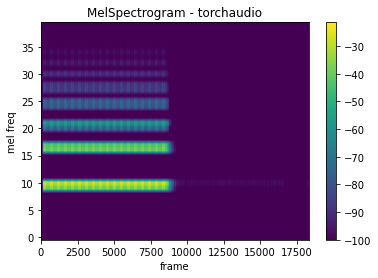

In [3]:
filename = "C:/Users/29147/Desktop/voice_dialing.wav"
waveform, sample_rate = torchaudio.load(filename)
mel_spectrogram = T.MelSpectrogram(
    sample_rate=params_data.sampling_rate,
    n_fft=params_data.mel_window_length,                # 窗口大小
    hop_length=params_data.mel_window_step,             # 帧移动，默认是窗口长度一半
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    onesided=True,
    n_mels=params_data.mel_n_channels,
)
spectrogram = mel_spectrogram(waveform)
plot_spectrogram(spectrogram[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

In [4]:
spectrogram.shape

torch.Size([1, 40, 18317])

In [5]:
m = SpeakerEncoder("cuda","cuda")

In [9]:
hidden = torch.zeros(3,1,256).to("cuda")
cell = torch.zeros(3,1,256).to("cuda")

In [7]:
hidden.shape

torch.Size([3, 1, 256])

In [11]:
# 得按照paramdata里的参数设置
hahaha = m.forward(spectrogram.transpose(1,2).to("cuda"),(hidden,cell))

In [12]:
hahaha.shape

torch.Size([1, 256])

In [13]:
torch.norm(hahaha, dim=1, keepdim=True)

tensor([[1.0000]], device='cuda:0', grad_fn=<CopyBackwards>)

## 验证：相似矩阵里不clone能咋的

In [4]:
testVec2 = torch.tensor([1.,2.,3.])
w2 = torch.tensor(3.,requires_grad=True)

testVec2 = testVec2.clone()/4
y = testVec2*w2
y.sum().backward()

print(w2.grad)


tensor(1.5000)


In [5]:
testVec1 = torch.tensor([1.,2.,3.])
w1 = torch.tensor(3.,requires_grad=True)

testVec1 = testVec1/4
y = testVec1*w1
y.sum().backward()

print(w1.grad)

tensor(1.5000)


In [8]:
testVec1

tensor([0.2500, 0.5000, 0.7500])

In [23]:
import numpy as np
import torch

In [24]:
embeds = torch.rand(5,5,128)
sim_matrix = torch.zeros(5, 5,
                         5)
mask_matrix = 1-np.eye(5, dtype=np.int)

C:\Users\29147\.conda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [25]:
mask = np.where(mask_matrix[0])
sim_matrix[mask]

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

In [26]:
mask

(array([1, 2, 3, 4], dtype=int64),)